<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/13_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Data

In [136]:
import os

ROOT = "/content/drive/MyDrive/Tensorflow"

os.chdir(ROOT)

In [137]:
import pandas as pd
import matplotlib.pyplot as plt


In [138]:
df = pd.read_csv("/content/drive/MyDrive/Tensorflow/BTC_USD_2014-11-02_2021-11-11-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [139]:
df.head()

Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
Date                                      ...                               
2014-11-02      BTC            325.22633  ...       338.12950      319.36700
2014-11-03      BTC            331.60083  ...       333.75983      319.04350
2014-11-04      BTC            324.71833  ...       332.75133      323.06333
2014-11-05      BTC            332.45666  ...       335.81166      320.93333
2014-11-06      BTC            336.58500  ...       341.49000      328.56166

[5 rows x 5 columns]

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2562 entries, 2014-11-02 to 2021-11-11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2562 non-null   object 
 1   Closing Price (USD)  2562 non-null   float64
 2   24h Open (USD)       2562 non-null   float64
 3   24h High (USD)       2562 non-null   float64
 4   24h Low (USD)        2562 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.1+ KB


In [141]:
len(df)

2562

In [142]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [143]:
bitcoin_prices.head()

Price
Date                 
2014-11-02  325.22633
2014-11-03  331.60083
2014-11-04  324.71833
2014-11-05  332.45666
2014-11-06  336.58500

In [144]:
len(bitcoin_prices)

2562

Text(0.5, 1.0, 'BTC historical Data')

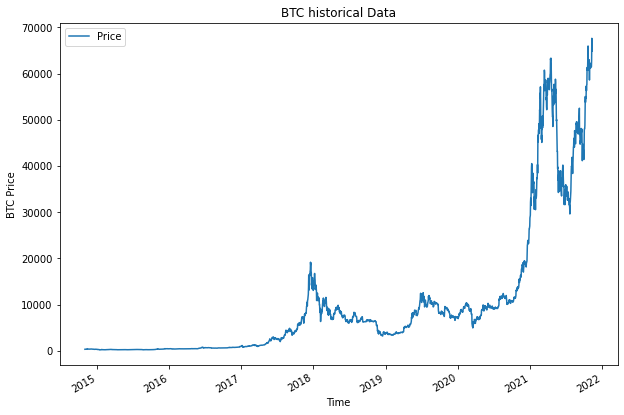

In [145]:
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.title("BTC historical Data")

In [146]:
bitcoin_prices = bitcoin_prices.iloc[:-100]

In [147]:
# Deleting last 100 rows
#bitcoin_prices_new = bitcoin_prices.drop(bitcoin_prices.tail(100).index,
                                     #inplace=True)

In [148]:
len(bitcoin_prices)

2462

Text(0.5, 1.0, 'BTC historical Data')

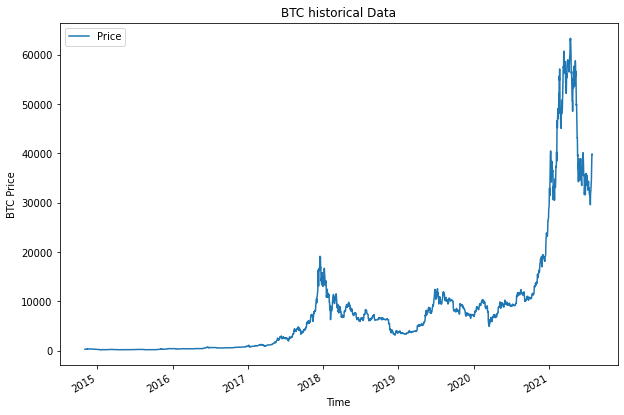

In [149]:
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.title("BTC historical Data")

### Train Test split

In [150]:
# bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[-10:], prices[-10:]

(array(['2021-07-21T00:00:00.000000000', '2021-07-22T00:00:00.000000000',
        '2021-07-23T00:00:00.000000000', '2021-07-24T00:00:00.000000000',
        '2021-07-25T00:00:00.000000000', '2021-07-26T00:00:00.000000000',
        '2021-07-27T00:00:00.000000000', '2021-07-28T00:00:00.000000000',
        '2021-07-29T00:00:00.000000000', '2021-07-30T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([29608.59725347, 32014.43603389, 32203.3656377 , 33117.75146222,
        34014.618359  , 34574.67066093, 37114.29662368, 38963.92285736,
        39917.4493694 , 39810.51797108]))

In [151]:
len(prices)

2462

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1969, 493, 1969, 493)

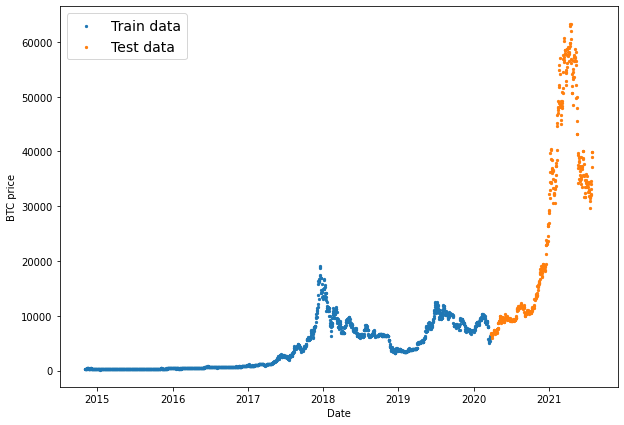

In [154]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)
plt.show()

In [155]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

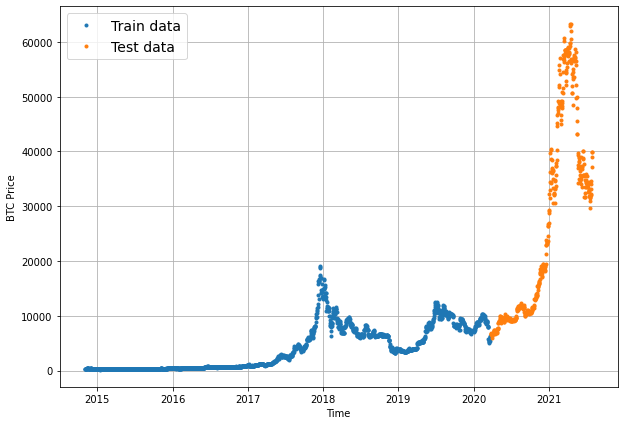

In [156]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Model 0: Naive Forecast (Baseline)

In [157]:
naive_forecast = y_test[:-1]

In [158]:
naive_forecast[:10], naive_forecast[-10:]

(array([6784.31801143, 6706.98508913, 6721.49539238, 6682.7800492 ,
        6229.48834283, 5922.48983509, 6483.73944553, 6446.42134684,
        6537.3364615 , 6850.55871169]),
 array([30940.28728402, 29608.59725347, 32014.43603389, 32203.3656377 ,
        33117.75146222, 34014.618359  , 34574.67066093, 37114.29662368,
        38963.92285736, 39917.4493694 ]))

In [159]:
y_test[-10:]

array([29608.59725347, 32014.43603389, 32203.3656377 , 33117.75146222,
       34014.618359  , 34574.67066093, 37114.29662368, 38963.92285736,
       39917.4493694 , 39810.51797108])

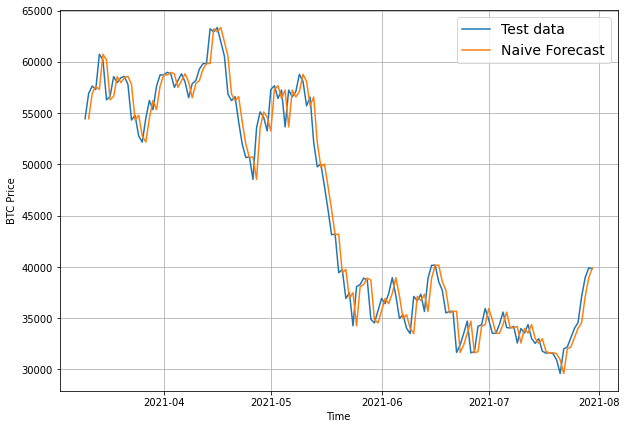

In [160]:
# plot
plt.figure(figsize=(10,7))
#plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, start=350, format="-" ,label="Test data")
plot_time_series(X_test[1:], naive_forecast, start=350, format="-", label="Naive Forecast")

In [161]:
import tensorflow as tf

In [162]:
# implementing MASE: Mean Absolute Scaled Error

def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [163]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9981720899380154

In [164]:
# evaluation values

def evaluate_pred(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  rmse = tf.sqrt(mse)

  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [165]:
naive_result = evaluate_pred(y_test[1:], naive_forecast)
naive_result

{'mae': 766.7916,
 'mape': 2.6282535,
 'mase': 0.9981721,
 'mse': 1660526.2,
 'rmse': 1288.6141}

### Formatting Data: Windowing dataset

In [166]:
HORIZON = 1
WINDOW_SIZE = 7

In [167]:
prices[:10]

array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
       344.81166, 343.065  , 358.50166, 368.07666])

In [168]:
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [169]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))

In [170]:
tf.squeeze(test_window).numpy()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [171]:
tf.squeeze(test_label).numpy()

7

In [172]:
import numpy as np

In [173]:
# create a function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

  #1. create a window of specific window_size(add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  #2. create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  #print(f"{window_indexes, window_indexes.shape}")

  #3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(f"{window_indexes, window_indexes.shape}")

  #4. Get labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [174]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2455, 2455)

In [175]:
# view 1st 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} --> Label {full_labels[i]}")

Window: [325.22633 331.60083 324.71833 332.45666 336.585   346.775   344.81166] --> Label [343.065]
Window: [331.60083 324.71833 332.45666 336.585   346.775   344.81166 343.065  ] --> Label [358.50166]
Window: [324.71833 332.45666 336.585   346.775   344.81166 343.065   358.50166] --> Label [368.07666]


In [176]:
# view last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} --> Label {full_labels[i-3]}")

Window: [29608.59725347 32014.43603389 32203.3656377  33117.75146222
 34014.618359   34574.67066093 37114.29662368] --> Label [38963.92285736]
Window: [32014.43603389 32203.3656377  33117.75146222 34014.618359
 34574.67066093 37114.29662368 38963.92285736] --> Label [39917.4493694]
Window: [32203.3656377  33117.75146222 34014.618359   34574.67066093
 37114.29662368 38963.92285736 39917.4493694 ] --> Label [39810.51797108]


In [177]:
prices[-1]

39810.5179710787

### Turining windows into training and test sets

In [178]:
def make_train_test_split(windows, labels, test_split=0.2):
 
  splits_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [179]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [180]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 486, 1969, 486)

In [181]:
train_windows[:5], train_labels[:5]

(array([[325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
         344.81166],
        [331.60083, 324.71833, 332.45666, 336.585  , 346.775  , 344.81166,
         343.065  ],
        [324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166],
        [332.45666, 336.585  , 346.775  , 344.81166, 343.065  , 358.50166,
         368.07666],
        [336.585  , 346.775  , 344.81166, 343.065  , 358.50166, 368.07666,
         376.99666]]), array([[343.065  ],
        [358.50166],
        [368.07666],
        [376.99666],
        [442.10666]]))

In [182]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [183]:
len(train_labels[:-HORIZON-1]), len(y_train[WINDOW_SIZE:])

(1967, 1962)

### Make modelling checkpoint

In [184]:
import os

# Function to implement a Modelcheckpoint with a specific filename

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [185]:
os.getcwd()

'/content/drive/MyDrive/Tensorflow'

### Model 1: Dense Model (window=7, horizon=1)

In [186]:
# set random seed
tf.random.set_seed(42)

#1. construct model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(HORIZON, activation="linear")
],name="model_1_dense")

#2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

#3.Fit the model
history_1 = model_1.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
 1/16 [>.............................] - ETA: 6s - loss: 2301.8364 - mae: 2301.8364 - mse: 11071037.0000INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 53ms/step - loss: 1032.8871 - mae: 1032.8871 - mse: 3229557.2500 - val_loss: 3140.8562 - val_mae: 3140.8562 - val_mse: 20273508.0000
Epoch 2/100
 1/16 [>.............................] - ETA: 0s - loss: 509.4172 - mae: 509.4172 - mse: 714162.7500INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 42ms/step - loss: 351.4597 - mae: 351.4597 - mse: 394944.9375 - val_loss: 1664.2784 - val_mae: 1664.2784 - val_mse: 6150904.0000
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 247.2664 - mae: 247.2664 - mse: 191027.8750INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 43ms/step - loss: 241.4506 - mae: 241.4506 - mse: 235117.1406 - val_loss: 1541.5391 - val_mae: 1541.5391 - val_mse: 5382165.5000
Epoch 4/100
 1/16 [>.............................] - ETA: 0s - loss: 206.9273 - mae: 206.9273 - mse: 169508.0156INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 49ms/step - loss: 222.5931 - mae: 222.5931 - mse: 210323.5000 - val_loss: 1364.6715 - val_mae: 1364.6715 - val_mse: 4591108.5000
Epoch 5/100
 1/16 [>.............................] - ETA: 0s - loss: 234.9257 - mae: 234.9257 - mse: 206263.0625INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 46ms/step - loss: 211.6067 - mae: 211.6067 - mse: 193107.8281 - val_loss: 1275.9647 - val_mae: 1275.9647 - val_mse: 4290351.0000
Epoch 6/100
 1/16 [>.............................] - ETA: 0s - loss: 149.2388 - mae: 149.2388 - mse: 118260.0703INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 47ms/step - loss: 210.0855 - mae: 210.0855 - mse: 190344.0156 - val_loss: 1244.6528 - val_mae: 1244.6528 - val_mse: 4229033.5000
Epoch 7/100
 1/16 [>.............................] - ETA: 0s - loss: 256.6895 - mae: 256.6895 - mse: 318959.6875INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 46ms/step - loss: 202.6106 - mae: 202.6106 - mse: 179367.4062 - val_loss: 1208.5098 - val_mae: 1208.5098 - val_mse: 3856331.0000
Epoch 8/100
 1/16 [>.............................] - ETA: 0s - loss: 197.3291 - mae: 197.3291 - mse: 230791.5938INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 193.5853 - mae: 193.5853 - mse: 165153.0312 - val_loss: 1180.5002 - val_mae: 1180.5002 - val_mse: 3567681.5000
Epoch 9/100
 1/16 [>.............................] - ETA: 0s - loss: 202.5970 - mae: 202.5970 - mse: 173851.5312INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 187.5148 - mae: 187.5148 - mse: 157143.4688 - val_loss: 1158.8799 - val_mae: 1158.8799 - val_mse: 3376000.7500
Epoch 10/100
 1/16 [>.............................] - ETA: 0s - loss: 269.1226 - mae: 269.1226 - mse: 287417.1875INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 44ms/step - loss: 183.8510 - mae: 183.8510 - mse: 150207.2344 - val_loss: 1115.7688 - val_mae: 1115.7688 - val_mse: 3187277.2500
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 180.3753 - mae: 180.3753 - mse: 145800.9062 - val_loss: 1216.5732 - val_mae: 1216.5732 - val_mse: 3377517.5000
Epoch 12/100
 1/16 [>.............................] - ETA: 0s - loss: 220.1067 - mae: 220.1067 - mse: 161681.4688INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 180.5310 - mae: 180.5310 - mse: 143815.7188 - val_loss: 1068.3212 - val_mae: 1068.3212 - val_mse: 2920267.5000
Epoch 13/100
 1/16 [>.............................] - ETA: 0s - loss: 176.3135 - mae: 176.3135 - mse: 130319.7344INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 42ms/step - loss: 172.1990 - mae: 172.1990 - mse: 133957.5312 - val_loss: 1047.2976 - val_mae: 1047.2976 - val_mse: 2804620.0000
Epoch 14/100
 1/16 [>.............................] - ETA: 0s - loss: 135.9319 - mae: 135.9319 - mse: 103396.3750INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 44ms/step - loss: 168.7647 - mae: 168.7647 - mse: 129164.1641 - val_loss: 1040.2698 - val_mae: 1040.2698 - val_mse: 2710291.5000
Epoch 15/100
 1/16 [>.............................] - ETA: 0s - loss: 137.1435 - mae: 137.1435 - mse: 82533.7188INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 166.2012 - mae: 166.2012 - mse: 126267.9688 - val_loss: 1006.4968 - val_mae: 1006.4968 - val_mse: 2576775.2500
Epoch 16/100
 1/16 [>.............................] - ETA: 0s - loss: 222.3281 - mae: 222.3281 - mse: 184141.6875INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 44ms/step - loss: 163.1069 - mae: 163.1069 - mse: 121766.9531 - val_loss: 985.7628 - val_mae: 985.7628 - val_mse: 2551765.2500
Epoch 17/100
 1/16 [>.............................] - ETA: 0s - loss: 140.4662 - mae: 140.4662 - mse: 84515.2266INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 161.1544 - mae: 161.1544 - mse: 117245.5938 - val_loss: 973.5729 - val_mae: 973.5729 - val_mse: 2402676.5000
Epoch 18/100
16/16 [==============================] - 0s 4ms/step - loss: 159.9366 - mae: 159.9366 - mse: 116329.2812 - val_loss: 980.7292 - val_mae: 980.7292 - val_mse: 2384201.7500
Epoch 19/100
 1/16 [>.............................] - ETA: 0s - loss: 124.3622 - mae: 124.3622 - mse: 71167.5781INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 42ms/step - loss: 162.2513 - mae: 162.2513 - mse: 119326.3828 - val_loss: 962.8463 - val_mae: 962.8463 - val_mse: 2451280.0000
Epoch 20/100
 1/16 [>.............................] - ETA: 0s - loss: 152.1717 - mae: 152.1717 - mse: 105939.1641INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 46ms/step - loss: 158.8437 - mae: 158.8437 - mse: 115683.6328 - val_loss: 936.0085 - val_mae: 936.0085 - val_mse: 2246607.2500
Epoch 21/100
 1/16 [>.............................] - ETA: 0s - loss: 159.9890 - mae: 159.9890 - mse: 110513.2266INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 67ms/step - loss: 155.3251 - mae: 155.3251 - mse: 109879.5781 - val_loss: 924.8110 - val_mae: 924.8110 - val_mse: 2202735.0000
Epoch 22/100
 1/16 [>.............................] - ETA: 0s - loss: 174.3616 - mae: 174.3616 - mse: 114874.3281INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 157.2904 - mae: 157.2904 - mse: 110384.6562 - val_loss: 923.8629 - val_mae: 923.8629 - val_mse: 2265462.5000
Epoch 23/100
16/16 [==============================] - 0s 3ms/step - loss: 156.1037 - mae: 156.1037 - mse: 108788.1250 - val_loss: 937.4535 - val_mae: 937.4535 - val_mse: 2324877.7500
Epoch 24/100
16/16 [==============================] - 0s 3ms/step - loss: 153.9103 - mae: 153.9103 - mse: 106931.5859 - val_loss: 1039.6965 - val_mae: 1039.6965 - val_mse: 2771009.5000
Epoch 25/100
 1/16 [>.............................] - ETA: 0s - loss: 195.3960 - mae: 195.3960 - mse: 162318.8438INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 48ms/step - loss: 163.4660 - mae: 163.4660 - mse: 115572.8047 - val_loss: 904.0978 - val_mae: 904.0978 - val_mse: 2183198.5000
Epoch 26/100
 1/16 [>.............................] - ETA: 0s - loss: 159.2774 - mae: 159.2774 - mse: 113660.2812INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 149.0410 - mae: 149.0410 - mse: 103397.0781 - val_loss: 899.8920 - val_mae: 899.8920 - val_mse: 2072556.0000
Epoch 27/100
 1/16 [>.............................] - ETA: 0s - loss: 143.7080 - mae: 143.7080 - mse: 91600.6641INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 147.7359 - mae: 147.7359 - mse: 102492.3438 - val_loss: 887.4896 - val_mae: 887.4896 - val_mse: 2039347.6250
Epoch 28/100
16/16 [==============================] - 0s 4ms/step - loss: 144.5267 - mae: 144.5267 - mse: 99501.1875 - val_loss: 937.5548 - val_mae: 937.5548 - val_mse: 2157091.7500
Epoch 29/100
16/16 [==============================] - 0s 4ms/step - loss: 149.3656 - mae: 149.3656 - mse: 101287.8750 - val_loss: 977.0312 - val_mae: 977.0312 - val_mse: 2278048.2500
Epoch 30/100
16/16 [==============================] - 0s 5ms/step - loss: 154.9521 - mae: 154.9521 - mse: 109153.7031 - val_loss: 944.4395 - val_mae: 944.4395 - val_mse: 2173180.2500
Epoch 31/100
 1/16 [>.............................] - ETA: 0s - loss: 147.0652 - mae: 147.0652 - mse: 85450.5469INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 43ms/step - loss: 145.7323 - mae: 145.7323 - mse: 99192.5078 - val_loss: 884.9972 - val_mae: 884.9972 - val_mse: 2005892.5000
Epoch 32/100
 1/16 [>.............................] - ETA: 0s - loss: 141.4395 - mae: 141.4395 - mse: 92960.9531INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 44ms/step - loss: 143.4305 - mae: 143.4305 - mse: 98579.7422 - val_loss: 859.6455 - val_mae: 859.6455 - val_mse: 1986932.6250
Epoch 33/100
 1/16 [>.............................] - ETA: 0s - loss: 163.3127 - mae: 163.3127 - mse: 110308.5625INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 43ms/step - loss: 144.4794 - mae: 144.4794 - mse: 99546.4609 - val_loss: 855.9361 - val_mae: 855.9361 - val_mse: 1971653.8750
Epoch 34/100
16/16 [==============================] - 0s 3ms/step - loss: 145.7489 - mae: 145.7489 - mse: 98749.9141 - val_loss: 888.7703 - val_mae: 888.7703 - val_mse: 2005434.5000
Epoch 35/100
 1/16 [>.............................] - ETA: 0s - loss: 157.9901 - mae: 157.9901 - mse: 133933.6875INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 43ms/step - loss: 145.7463 - mae: 145.7463 - mse: 99112.2734 - val_loss: 852.2140 - val_mae: 852.2140 - val_mse: 1918776.6250
Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 141.4846 - mae: 141.4846 - mse: 97366.9141 - val_loss: 862.0698 - val_mae: 862.0698 - val_mse: 1998364.1250
Epoch 37/100
 1/16 [>.............................] - ETA: 0s - loss: 148.2617 - mae: 148.2617 - mse: 70746.0000INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 145.5778 - mae: 145.5778 - mse: 99493.7422 - val_loss: 839.3591 - val_mae: 839.3591 - val_mse: 1898357.2500
Epoch 38/100
16/16 [==============================] - 0s 3ms/step - loss: 149.1893 - mae: 149.1893 - mse: 101795.3125 - val_loss: 928.7697 - val_mae: 928.7697 - val_mse: 2113188.5000
Epoch 39/100
 1/16 [>.............................] - ETA: 0s - loss: 119.6289 - mae: 119.6289 - mse: 57417.5547INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 146.5056 - mae: 146.5056 - mse: 98500.3984 - val_loss: 835.1110 - val_mae: 835.1110 - val_mse: 1877097.3750
Epoch 40/100
 1/16 [>.............................] - ETA: 0s - loss: 106.9254 - mae: 106.9254 - mse: 53715.7344INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 46ms/step - loss: 141.5099 - mae: 141.5099 - mse: 95604.1328 - val_loss: 833.1370 - val_mae: 833.1370 - val_mse: 1868164.5000
Epoch 41/100
16/16 [==============================] - 0s 4ms/step - loss: 140.0921 - mae: 140.0921 - mse: 94498.2656 - val_loss: 845.3928 - val_mae: 845.3928 - val_mse: 1880102.2500
Epoch 42/100
 1/16 [>.............................] - ETA: 0s - loss: 164.3537 - mae: 164.3537 - mse: 130041.5312INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 43ms/step - loss: 138.2833 - mae: 138.2833 - mse: 92622.9062 - val_loss: 826.9249 - val_mae: 826.9249 - val_mse: 1852407.6250
Epoch 43/100
16/16 [==============================] - 0s 4ms/step - loss: 138.2925 - mae: 138.2925 - mse: 93407.1172 - val_loss: 847.6710 - val_mae: 847.6710 - val_mse: 1936527.5000
Epoch 44/100
16/16 [==============================] - 0s 5ms/step - loss: 142.3690 - mae: 142.3690 - mse: 94410.8203 - val_loss: 829.5346 - val_mae: 829.5346 - val_mse: 1841291.6250
Epoch 45/100
16/16 [==============================] - 0s 4ms/step - loss: 138.0014 - mae: 138.0014 - mse: 92653.8594 - val_loss: 879.7257 - val_mae: 879.7257 - val_mse: 1955510.2500
Epoch 46/100
16/16 [==============================] - 0s 3ms/step - loss: 138.4547 - mae: 138.4547 - mse: 92250.6094 - val_loss: 833.3894 - val_mae: 833.3894 - val_mse: 1885843.5000
Epoch 47/100
 1/16 [>.............................] - ETA: 0s - loss: 129.3562 - mae: 129.3562 - mse: 

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 43ms/step - loss: 138.3948 - mae: 138.3948 - mse: 92413.1094 - val_loss: 815.9078 - val_mae: 815.9078 - val_mse: 1811669.0000
Epoch 48/100
16/16 [==============================] - 0s 4ms/step - loss: 137.3776 - mae: 137.3776 - mse: 91977.0625 - val_loss: 826.3243 - val_mae: 826.3243 - val_mse: 1822595.1250
Epoch 49/100
16/16 [==============================] - 0s 4ms/step - loss: 138.3587 - mae: 138.3587 - mse: 90923.7734 - val_loss: 865.0447 - val_mae: 865.0447 - val_mse: 1909271.0000
Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 139.6008 - mae: 139.6008 - mse: 91846.0234 - val_loss: 817.1131 - val_mae: 817.1131 - val_mse: 1832380.3750
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 141.0456 - mae: 141.0456 - mse: 91873.6797 - val_loss: 834.8843 - val_mae: 834.8843 - val_mse: 1884621.1250
Epoch 52/100
16/16 [==============================] - 0s 3ms/step - loss: 142.3547 - mae: 142.3547 - m

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 139.6477 - mae: 139.6477 - mse: 93177.4844 - val_loss: 803.5254 - val_mae: 803.5254 - val_mse: 1788008.8750
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 134.9893 - mae: 134.9893 - mse: 89600.0000 - val_loss: 991.3262 - val_mae: 991.3262 - val_mse: 2426316.7500
Epoch 55/100
 1/16 [>.............................] - ETA: 0s - loss: 178.0212 - mae: 178.0212 - mse: 110238.8594INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 42ms/step - loss: 142.8886 - mae: 142.8886 - mse: 93439.1406 - val_loss: 802.3965 - val_mae: 802.3965 - val_mse: 1771465.6250
Epoch 56/100
16/16 [==============================] - 0s 3ms/step - loss: 138.3439 - mae: 138.3439 - mse: 88976.3906 - val_loss: 807.6014 - val_mae: 807.6014 - val_mse: 1801450.3750
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 135.3309 - mae: 135.3309 - mse: 89256.4922 - val_loss: 915.3425 - val_mae: 915.3425 - val_mse: 2128595.0000
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 147.6825 - mae: 147.6825 - mse: 96860.2656 - val_loss: 889.8040 - val_mae: 889.8040 - val_mse: 2037924.3750
Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 142.7408 - mae: 142.7408 - mse: 93788.7031 - val_loss: 835.5764 - val_mae: 835.5764 - val_mse: 1875838.3750
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 138.5095 - mae: 138.5095 - m

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 46ms/step - loss: 137.3216 - mae: 137.3216 - mse: 89936.3750 - val_loss: 795.4156 - val_mae: 795.4156 - val_mse: 1763307.5000
Epoch 62/100
 1/16 [>.............................] - ETA: 0s - loss: 140.1223 - mae: 140.1223 - mse: 107664.0312INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 134.8388 - mae: 134.8388 - mse: 90291.7188 - val_loss: 792.7587 - val_mae: 792.7587 - val_mse: 1755547.1250
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 136.3613 - mae: 136.3613 - mse: 90437.0078 - val_loss: 853.0699 - val_mae: 853.0699 - val_mse: 1864406.8750
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 141.1513 - mae: 141.1513 - mse: 91789.8203 - val_loss: 806.1766 - val_mae: 806.1766 - val_mse: 1763690.8750
Epoch 65/100
 1/16 [>.............................] - ETA: 0s - loss: 132.5745 - mae: 132.5745 - mse: 93599.3281INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 43ms/step - loss: 133.5073 - mae: 133.5073 - mse: 88170.8281 - val_loss: 791.3454 - val_mae: 791.3454 - val_mse: 1740952.0000
Epoch 66/100
16/16 [==============================] - 0s 4ms/step - loss: 132.8781 - mae: 132.8781 - mse: 87388.7109 - val_loss: 794.2551 - val_mae: 794.2551 - val_mse: 1742641.3750
Epoch 67/100
 1/16 [>.............................] - ETA: 0s - loss: 118.4975 - mae: 118.4975 - mse: 55073.5195INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 47ms/step - loss: 133.7434 - mae: 133.7434 - mse: 87837.1250 - val_loss: 789.2407 - val_mae: 789.2407 - val_mse: 1746684.0000
Epoch 68/100
16/16 [==============================] - 0s 3ms/step - loss: 143.4148 - mae: 143.4148 - mse: 92804.3359 - val_loss: 805.5637 - val_mae: 805.5637 - val_mse: 1791140.1250
Epoch 69/100
16/16 [==============================] - 0s 3ms/step - loss: 133.9799 - mae: 133.9799 - mse: 87487.4297 - val_loss: 800.4972 - val_mae: 800.4972 - val_mse: 1750302.2500
Epoch 70/100
 1/16 [>.............................] - ETA: 0s - loss: 129.1688 - mae: 129.1688 - mse: 69640.3281INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 43ms/step - loss: 134.2558 - mae: 134.2558 - mse: 87516.4062 - val_loss: 787.2278 - val_mae: 787.2278 - val_mse: 1733910.3750
Epoch 71/100
16/16 [==============================] - 0s 4ms/step - loss: 132.4837 - mae: 132.4837 - mse: 86552.9688 - val_loss: 789.5493 - val_mae: 789.5493 - val_mse: 1748970.3750
Epoch 72/100
16/16 [==============================] - 0s 3ms/step - loss: 136.3186 - mae: 136.3186 - mse: 88365.8828 - val_loss: 790.3834 - val_mae: 790.3834 - val_mse: 1751783.5000
Epoch 73/100
16/16 [==============================] - 0s 4ms/step - loss: 134.7349 - mae: 134.7349 - mse: 87562.0000 - val_loss: 850.8448 - val_mae: 850.8448 - val_mse: 1855010.2500
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 133.1693 - mae: 133.1693 - mse: 86890.5625 - val_loss: 887.8121 - val_mae: 887.8121 - val_mse: 1946039.0000
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 137.9084 - mae: 137.9084 - m

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 133.8362 - mae: 133.8362 - mse: 88757.8672 - val_loss: 784.8715 - val_mae: 784.8715 - val_mse: 1720949.0000
Epoch 78/100
16/16 [==============================] - 0s 3ms/step - loss: 133.5860 - mae: 133.5860 - mse: 86667.5312 - val_loss: 831.1951 - val_mae: 831.1951 - val_mse: 1807137.1250
Epoch 79/100
16/16 [==============================] - 0s 3ms/step - loss: 133.8132 - mae: 133.8132 - mse: 87369.0625 - val_loss: 841.1603 - val_mae: 841.1603 - val_mse: 1884546.8750
Epoch 80/100
 1/16 [>.............................] - ETA: 0s - loss: 145.7866 - mae: 145.7866 - mse: 86333.9062INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 67ms/step - loss: 137.2893 - mae: 137.2893 - mse: 89552.4062 - val_loss: 784.3696 - val_mae: 784.3696 - val_mse: 1717470.8750
Epoch 81/100
16/16 [==============================] - 0s 4ms/step - loss: 135.5404 - mae: 135.5404 - mse: 88076.2969 - val_loss: 816.1312 - val_mae: 816.1312 - val_mse: 1814523.2500
Epoch 82/100
16/16 [==============================] - 0s 4ms/step - loss: 146.6078 - mae: 146.6078 - mse: 97534.1094 - val_loss: 940.3641 - val_mae: 940.3641 - val_mse: 2207245.7500
Epoch 83/100
 1/16 [>.............................] - ETA: 0s - loss: 157.5388 - mae: 157.5388 - mse: 144353.7969INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 46ms/step - loss: 141.7420 - mae: 141.7420 - mse: 92542.9375 - val_loss: 782.9375 - val_mae: 782.9375 - val_mse: 1713029.0000
Epoch 84/100
16/16 [==============================] - 0s 4ms/step - loss: 132.7134 - mae: 132.7134 - mse: 86282.7734 - val_loss: 844.3607 - val_mae: 844.3607 - val_mse: 1836442.6250
Epoch 85/100
 1/16 [>.............................] - ETA: 0s - loss: 138.0824 - mae: 138.0824 - mse: 91592.5312INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 133.8907 - mae: 133.8907 - mse: 87014.0234 - val_loss: 780.0975 - val_mae: 780.0975 - val_mse: 1709718.5000
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 130.9746 - mae: 130.9746 - mse: 85656.7656 - val_loss: 835.2051 - val_mae: 835.2051 - val_mse: 1863463.6250
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 135.3176 - mae: 135.3176 - mse: 88925.3516 - val_loss: 808.5755 - val_mae: 808.5755 - val_mse: 1794615.0000
Epoch 88/100
 1/16 [>.............................] - ETA: 0s - loss: 129.0064 - mae: 129.0064 - mse: 78769.2656INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 135.4424 - mae: 135.4424 - mse: 86823.3281 - val_loss: 777.1447 - val_mae: 777.1447 - val_mse: 1708545.6250
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 133.9549 - mae: 133.9549 - mse: 87783.0625 - val_loss: 810.3855 - val_mae: 810.3855 - val_mse: 1758859.3750
Epoch 90/100
 1/16 [>.............................] - ETA: 0s - loss: 131.6919 - mae: 131.6919 - mse: 118677.1094INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


16/16 [==============================] - 1s 45ms/step - loss: 132.8404 - mae: 132.8404 - mse: 86315.7422 - val_loss: 776.6529 - val_mae: 776.6529 - val_mse: 1705817.7500
Epoch 91/100
16/16 [==============================] - 0s 5ms/step - loss: 132.7588 - mae: 132.7588 - mse: 87373.0000 - val_loss: 780.4913 - val_mae: 780.4913 - val_mse: 1706202.5000
Epoch 92/100
16/16 [==============================] - 0s 3ms/step - loss: 132.4175 - mae: 132.4175 - mse: 86010.4219 - val_loss: 776.7550 - val_mae: 776.7550 - val_mse: 1708466.1250
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 130.4014 - mae: 130.4014 - mse: 85492.1719 - val_loss: 791.0267 - val_mae: 791.0267 - val_mse: 1721151.1250
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 131.1177 - mae: 131.1177 - mse: 86258.5078 - val_loss: 815.5356 - val_mae: 815.5356 - val_mse: 1769819.8750
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 134.1306 - mae: 134.1306 - m

In [187]:
model_1.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 777.1995 - mae: 777.1995 - mse: 1699917.8750


[777.199462890625, 777.199462890625, 1699917.875]

In [188]:
# load saved best model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 776.6528 - mae: 776.6528 - mse: 1705818.0000


[776.6527709960938, 776.6527709960938, 1705818.0]

### Making forecasting with a model

In [189]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [190]:
model_1_preds = make_preds(model_1, test_windows)

In [191]:
len(model_1_preds)

486

In [192]:
test_labels.shape, model_1_preds.shape

((486, 1), TensorShape([486]))

In [193]:
model_1_results = evaluate_pred(y_true=tf.squeeze(test_labels), 
                                y_pred=model_1_preds)
model_1_results

{'mae': 776.65283,
 'mape': 2.626138,
 'mase': 1.0024073,
 'mse': 1705817.8,
 'rmse': 1306.0696}

In [194]:
naive_result

{'mae': 766.7916,
 'mape': 2.6282535,
 'mase': 0.9981721,
 'mse': 1660526.2,
 'rmse': 1288.6141}

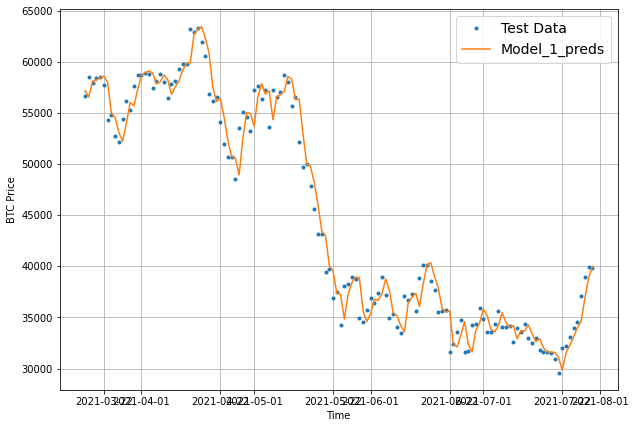

In [195]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_1_preds, 
                 start=offset,
                 format="-",
                 label="Model_1_preds")

### Model 2: Dense (window=30, horizon=1)

In [196]:
HORIZON = 1 
WINDOW_SIZE = 30

In [197]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2432, 2432)

In [198]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 463, 1969, 463)

In [199]:
# Model 2
# set random seed
tf.random.set_seed(42)

#1. construct model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(HORIZON, activation="linear")
],name="model_2_dense")

#2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

#3.Fit the model
history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=0,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


In [200]:
model_2.evaluate(test_windows,test_labels)

15/15 [==============================] - 0s 1ms/step - loss: 865.0096 - mae: 865.0096 - mse: 1974435.3750


[865.0095825195312, 865.0095825195312, 1974435.375]

In [201]:
# load saved best model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

15/15 [==============================] - 0s 2ms/step - loss: 865.0096 - mae: 865.0096 - mse: 1974435.3750


[865.0095825195312, 865.0095825195312, 1974435.375]

In [202]:
model_2_preds = make_preds(model_2, test_windows)

In [203]:
model_2_results = evaluate_pred(y_true=tf.squeeze(test_labels), 
                                y_pred=model_2_preds)
model_2_results

{'mae': 865.00946,
 'mape': 2.835078,
 'mase': 1.0757153,
 'mse': 1974434.9,
 'rmse': 1405.1459}

In [204]:
naive_result

{'mae': 766.7916,
 'mape': 2.6282535,
 'mase': 0.9981721,
 'mse': 1660526.2,
 'rmse': 1288.6141}

In [205]:
model_1_results

{'mae': 776.65283,
 'mape': 2.626138,
 'mase': 1.0024073,
 'mse': 1705817.8,
 'rmse': 1306.0696}

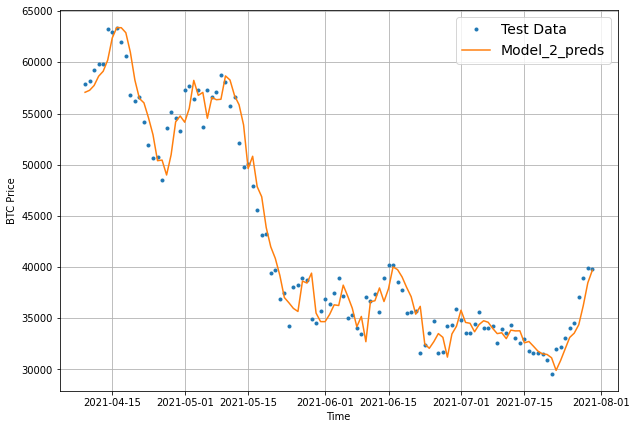

In [206]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_2_preds, 
                 start=offset,
                 format="-",
                 label="Model_2_preds")


### Model 3: Dense (Window size =30, horizon=1)

In [207]:
HORIZON = 7 
WINDOW_SIZE = 30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2426, 2426)

In [208]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 457, 1969, 457)

In [209]:
# Model 3
# set random seed
tf.random.set_seed(42)

#1. construct model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(HORIZON, activation="linear")
],name="model_3_dense")

#2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

#3.Fit the model
history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=0,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


In [210]:
model_3.evaluate(test_windows,test_labels)

15/15 [==============================] - 0s 2ms/step - loss: 1798.6237 - mae: 1798.6237 - mse: 8763479.0000


[1798.6236572265625, 1798.6236572265625, 8763479.0]

In [211]:
# load saved best model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows,test_labels)

15/15 [==============================] - 0s 1ms/step - loss: 1785.5605 - mae: 1785.5605 - mse: 8872233.0000


[1785.560546875, 1785.560546875, 8872233.0]

In [212]:
model_3_preds = make_preds(model_3, test_windows)

In [213]:
model_3_preds.shape

TensorShape([457, 7])

In [214]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [215]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels), 
                                y_pred=(model_3_preds))
model_3_results

{'mae': 1785.5605,
 'mape': 5.7166805,
 'mase': 2.212832,
 'mse': 8872233.0,
 'rmse': 2046.8735}

In [216]:
model_1_results, model_2_results

({'mae': 776.65283,
  'mape': 2.626138,
  'mase': 1.0024073,
  'mse': 1705817.8,
  'rmse': 1306.0696},
 {'mae': 865.00946,
  'mape': 2.835078,
  'mase': 1.0757153,
  'mse': 1974434.9,
  'rmse': 1405.1459})

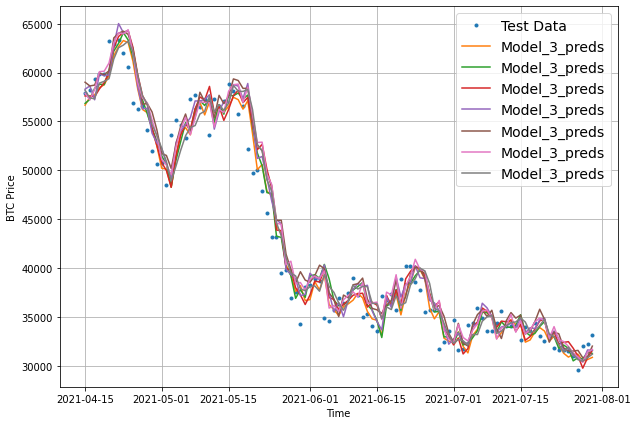

In [217]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_3_preds, 
                 start=offset,
                 format="-",
                 label="Model_3_preds")

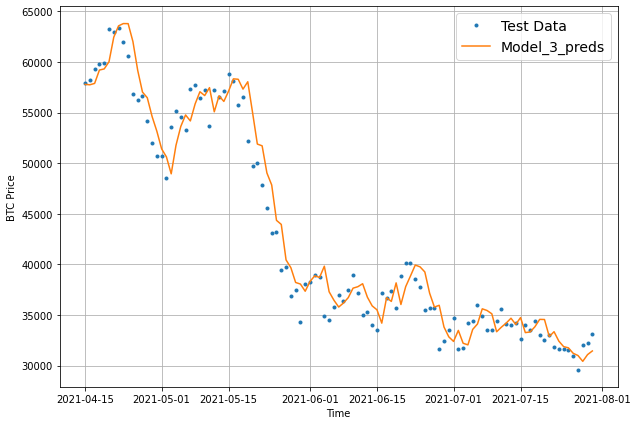

In [218]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-",
                 label="Model_3_preds")

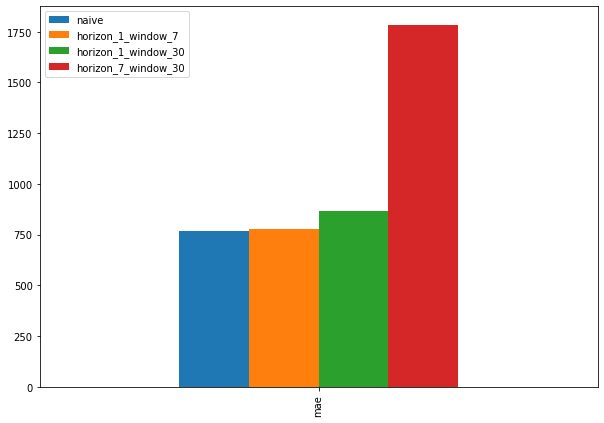

In [219]:
pd.DataFrame({"naive": naive_result["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4: Conv1D

In [220]:
HORIZON = 1
WINDOW_SIZE = 7
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2455, 2455)

In [221]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 486, 1969, 486)

In [222]:
train_windows[0].shape

(7,)

In [223]:
x = tf.constant(train_windows[0])
x, x.shape

(<tf.Tensor: shape=(7,), dtype=float64, numpy=
 array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
        344.81166])>, TensorShape([7]))

In [224]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [225]:
x.shape, expand_dims_layer(x).shape

(TensorShape([7]), TensorShape([7, 1]))

In [226]:
# Model 4
# set random seed
tf.random.set_seed(42)

#1. construct model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
                               tf.keras.layers.Dense(HORIZON)
],name="model_4_conv1d")

#2. Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
#3.Fit the model
history_4 = model_4.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
 1/16 [>.............................] - ETA: 7s - loss: 3125.8262 - mae: 3125.8262 - mse: 20258400.0000INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 2s 67ms/step - loss: 1708.5942 - mae: 1708.5942 - mse: 7589427.0000 - val_loss: 1732.5232 - val_mae: 1732.5232 - val_mse: 7710509.5000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 425.2935 - mae: 425.2935 - mse: 577168.1875 - val_loss: 2059.9023 - val_mae: 2059.9023 - val_mse: 8560785.0000
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 309.6993 - mae: 309.6993 - mse: 266947.0625INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 268.3050 - mae: 268.3050 - mse: 281739.1562 - val_loss: 1371.0123 - val_mae: 1371.0123 - val_mse: 5097040.0000
Epoch 4/100
 1/16 [>.............................] - ETA: 0s - loss: 202.3040 - mae: 202.3040 - mse: 173640.9688INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 233.2774 - mae: 233.2774 - mse: 222884.9219 - val_loss: 1355.8490 - val_mae: 1355.8490 - val_mse: 4988261.0000
Epoch 5/100
 1/16 [>.............................] - ETA: 0s - loss: 257.5300 - mae: 257.5300 - mse: 264265.4688INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 223.7746 - mae: 223.7746 - mse: 215755.9062 - val_loss: 1346.7900 - val_mae: 1346.7900 - val_mse: 4829217.0000
Epoch 6/100
 1/16 [>.............................] - ETA: 0s - loss: 153.4507 - mae: 153.4507 - mse: 121669.5469INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 219.7586 - mae: 219.7586 - mse: 208560.2969 - val_loss: 1325.8375 - val_mae: 1325.8375 - val_mse: 4725820.0000
Epoch 7/100
 1/16 [>.............................] - ETA: 0s - loss: 266.1341 - mae: 266.1341 - mse: 338203.2500INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 217.6124 - mae: 217.6124 - mse: 205131.8750 - val_loss: 1310.6278 - val_mae: 1310.6277 - val_mse: 4598492.0000
Epoch 8/100
 1/16 [>.............................] - ETA: 0s - loss: 211.6028 - mae: 211.6028 - mse: 259041.5625INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 213.6935 - mae: 213.6935 - mse: 197866.9844 - val_loss: 1292.6304 - val_mae: 1292.6304 - val_mse: 4469377.5000
Epoch 9/100
 1/16 [>.............................] - ETA: 0s - loss: 231.1727 - mae: 231.1727 - mse: 225239.7656INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 212.1714 - mae: 212.1714 - mse: 194325.7031 - val_loss: 1289.9064 - val_mae: 1289.9064 - val_mse: 4338447.5000
Epoch 10/100
 1/16 [>.............................] - ETA: 0s - loss: 298.7489 - mae: 298.7489 - mse: 354419.7500INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 207.8949 - mae: 207.8949 - mse: 188149.1406 - val_loss: 1263.0854 - val_mae: 1263.0854 - val_mse: 4200721.0000
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 204.2210 - mae: 204.2210 - mse: 182438.3750 - val_loss: 1283.7561 - val_mae: 1283.7561 - val_mse: 4142322.7500
Epoch 12/100
 1/16 [>.............................] - ETA: 0s - loss: 242.7014 - mae: 242.7014 - mse: 212800.0625INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 62ms/step - loss: 202.9934 - mae: 202.9934 - mse: 179540.6094 - val_loss: 1225.9191 - val_mae: 1225.9191 - val_mse: 3944517.0000
Epoch 13/100
 1/16 [>.............................] - ETA: 0s - loss: 196.8223 - mae: 196.8223 - mse: 170494.6562INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 81ms/step - loss: 198.5536 - mae: 198.5536 - mse: 172446.8750 - val_loss: 1212.7140 - val_mae: 1212.7140 - val_mse: 3815238.5000
Epoch 14/100
 1/16 [>.............................] - ETA: 0s - loss: 166.4981 - mae: 166.4981 - mse: 158954.2969INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 194.6387 - mae: 194.6387 - mse: 166668.4062 - val_loss: 1183.3977 - val_mae: 1183.3977 - val_mse: 3678634.2500
Epoch 15/100
 1/16 [>.............................] - ETA: 0s - loss: 146.6378 - mae: 146.6378 - mse: 95038.5312INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 62ms/step - loss: 192.4991 - mae: 192.4991 - mse: 162166.2656 - val_loss: 1158.2484 - val_mae: 1158.2484 - val_mse: 3557256.2500
Epoch 16/100
 1/16 [>.............................] - ETA: 0s - loss: 244.6544 - mae: 244.6544 - mse: 218933.7812INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 189.0681 - mae: 189.0681 - mse: 157264.0312 - val_loss: 1139.4175 - val_mae: 1139.4175 - val_mse: 3431756.5000
Epoch 17/100
16/16 [==============================] - 0s 3ms/step - loss: 185.6471 - mae: 185.6471 - mse: 152676.0156 - val_loss: 1142.3489 - val_mae: 1142.3490 - val_mse: 3325740.0000
Epoch 18/100
 1/16 [>.............................] - ETA: 0s - loss: 190.4355 - mae: 190.4355 - mse: 156206.7969INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 188.0310 - mae: 188.0310 - mse: 153287.9219 - val_loss: 1111.7089 - val_mae: 1111.7089 - val_mse: 3196953.5000
Epoch 19/100
16/16 [==============================] - 0s 3ms/step - loss: 188.7068 - mae: 188.7068 - mse: 152508.6406 - val_loss: 1123.7361 - val_mae: 1123.7361 - val_mse: 3144228.7500
Epoch 20/100
 1/16 [>.............................] - ETA: 0s - loss: 152.0679 - mae: 152.0679 - mse: 112146.5703INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 181.9285 - mae: 181.9285 - mse: 140489.9375 - val_loss: 1084.1907 - val_mae: 1084.1907 - val_mse: 3002623.0000
Epoch 21/100
 1/16 [>.............................] - ETA: 0s - loss: 165.3533 - mae: 165.3533 - mse: 113476.0547INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 181.6915 - mae: 181.6915 - mse: 141165.6406 - val_loss: 1052.6686 - val_mae: 1052.6686 - val_mse: 2974825.0000
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 177.5594 - mae: 177.5594 - mse: 136831.0156 - val_loss: 1078.0790 - val_mae: 1078.0790 - val_mse: 2877691.7500
Epoch 23/100
 1/16 [>.............................] - ETA: 0s - loss: 180.3192 - mae: 180.3192 - mse: 150383.0938INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 168.5046 - mae: 168.5046 - mse: 129000.5000 - val_loss: 1021.8651 - val_mae: 1021.8651 - val_mse: 2748450.0000
Epoch 24/100
 1/16 [>.............................] - ETA: 0s - loss: 148.2582 - mae: 148.2582 - mse: 89227.5703INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 168.9877 - mae: 168.9877 - mse: 127976.8359 - val_loss: 1008.9404 - val_mae: 1008.9404 - val_mse: 2681408.0000
Epoch 25/100
 1/16 [>.............................] - ETA: 0s - loss: 174.0887 - mae: 174.0887 - mse: 123080.6250INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 61ms/step - loss: 165.7496 - mae: 165.7496 - mse: 124560.7344 - val_loss: 996.7856 - val_mae: 996.7856 - val_mse: 2599948.5000
Epoch 26/100
 1/16 [>.............................] - ETA: 0s - loss: 179.6732 - mae: 179.6732 - mse: 150077.5312INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 56ms/step - loss: 163.0756 - mae: 163.0756 - mse: 121608.9844 - val_loss: 992.1192 - val_mae: 992.1192 - val_mse: 2517845.5000
Epoch 27/100
16/16 [==============================] - 0s 5ms/step - loss: 160.8960 - mae: 160.8960 - mse: 117736.7344 - val_loss: 1004.0772 - val_mae: 1004.0772 - val_mse: 2502774.5000
Epoch 28/100
16/16 [==============================] - 0s 3ms/step - loss: 159.2259 - mae: 159.2259 - mse: 114220.3516 - val_loss: 1008.6929 - val_mae: 1008.6929 - val_mse: 2486994.7500
Epoch 29/100
 1/16 [>.............................] - ETA: 0s - loss: 157.2840 - mae: 157.2840 - mse: 88914.5000INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 162.2737 - mae: 162.2737 - mse: 117174.2812 - val_loss: 971.3234 - val_mae: 971.3234 - val_mse: 2366429.2500
Epoch 30/100
 1/16 [>.............................] - ETA: 0s - loss: 179.8146 - mae: 179.8146 - mse: 157421.6875INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 155.0658 - mae: 155.0657 - mse: 111233.7109 - val_loss: 940.7006 - val_mae: 940.7006 - val_mse: 2304936.7500
Epoch 31/100
16/16 [==============================] - 0s 5ms/step - loss: 155.1667 - mae: 155.1667 - mse: 109282.5547 - val_loss: 975.1465 - val_mae: 975.1465 - val_mse: 2337285.0000
Epoch 32/100
 1/16 [>.............................] - ETA: 0s - loss: 151.0329 - mae: 151.0329 - mse: 100305.8594INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 62ms/step - loss: 152.1352 - mae: 152.1352 - mse: 108165.7969 - val_loss: 924.1945 - val_mae: 924.1945 - val_mse: 2266424.0000
Epoch 33/100
 1/16 [>.............................] - ETA: 0s - loss: 172.5975 - mae: 172.5975 - mse: 117083.4844INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 153.5153 - mae: 153.5153 - mse: 108766.8203 - val_loss: 914.4948 - val_mae: 914.4948 - val_mse: 2205915.2500
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 151.6044 - mae: 151.6044 - mse: 106395.9141 - val_loss: 925.8115 - val_mae: 925.8115 - val_mse: 2165485.5000
Epoch 35/100
 1/16 [>.............................] - ETA: 0s - loss: 157.6953 - mae: 157.6953 - mse: 132149.6875INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 84ms/step - loss: 152.2787 - mae: 152.2787 - mse: 106260.2344 - val_loss: 910.3981 - val_mae: 910.3981 - val_mse: 2117867.7500
Epoch 36/100
 1/16 [>.............................] - ETA: 0s - loss: 153.8762 - mae: 153.8762 - mse: 93333.2891INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 61ms/step - loss: 146.8560 - mae: 146.8560 - mse: 102840.9531 - val_loss: 894.7363 - val_mae: 894.7363 - val_mse: 2142079.2500
Epoch 37/100
 1/16 [>.............................] - ETA: 0s - loss: 158.0915 - mae: 158.0915 - mse: 80560.1406INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 151.1482 - mae: 151.1482 - mse: 105770.3516 - val_loss: 887.7806 - val_mae: 887.7806 - val_mse: 2110169.0000
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 154.6591 - mae: 154.6591 - mse: 106645.3281 - val_loss: 908.1343 - val_mae: 908.1343 - val_mse: 2084164.7500
Epoch 39/100
 1/16 [>.............................] - ETA: 0s - loss: 113.4535 - mae: 113.4535 - mse: 57410.5742INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 65ms/step - loss: 149.0603 - mae: 149.0603 - mse: 102636.9453 - val_loss: 872.7212 - val_mae: 872.7212 - val_mse: 2023002.2500
Epoch 40/100
16/16 [==============================] - 0s 4ms/step - loss: 147.8287 - mae: 147.8287 - mse: 101688.1484 - val_loss: 886.5862 - val_mae: 886.5862 - val_mse: 2108291.2500
Epoch 41/100
16/16 [==============================] - 0s 3ms/step - loss: 148.8920 - mae: 148.8920 - mse: 101024.5391 - val_loss: 887.0046 - val_mae: 887.0046 - val_mse: 2107617.2500
Epoch 42/100
16/16 [==============================] - 0s 4ms/step - loss: 146.6764 - mae: 146.6764 - mse: 102126.8750 - val_loss: 903.9785 - val_mae: 903.9785 - val_mse: 2164168.7500
Epoch 43/100
16/16 [==============================] - 0s 5ms/step - loss: 146.1439 - mae: 146.1439 - mse: 101353.1719 - val_loss: 910.5792 - val_mae: 910.5792 - val_mse: 2185076.0000
Epoch 44/100
 1/16 [>.............................] - ETA: 0s - loss: 118.3832 - mae: 118.3832 - 

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 151.6192 - mae: 151.6192 - mse: 102973.8906 - val_loss: 857.3073 - val_mae: 857.3073 - val_mse: 1986308.5000
Epoch 45/100
16/16 [==============================] - 0s 4ms/step - loss: 145.4990 - mae: 145.4990 - mse: 100890.4688 - val_loss: 909.5447 - val_mae: 909.5447 - val_mse: 2059421.2500
Epoch 46/100
 1/16 [>.............................] - ETA: 0s - loss: 147.4298 - mae: 147.4298 - mse: 68656.5781INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 142.7397 - mae: 142.7397 - mse: 96495.8281 - val_loss: 844.3004 - val_mae: 844.3004 - val_mse: 1923423.7500
Epoch 47/100
 1/16 [>.............................] - ETA: 0s - loss: 126.8980 - mae: 126.8980 - mse: 64562.7070INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 142.4148 - mae: 142.4148 - mse: 97082.9609 - val_loss: 841.8160 - val_mae: 841.8160 - val_mse: 1919598.6250
Epoch 48/100
16/16 [==============================] - 0s 3ms/step - loss: 140.9670 - mae: 140.9670 - mse: 96002.0859 - val_loss: 843.1539 - val_mae: 843.1539 - val_mse: 1892031.6250
Epoch 49/100
 1/16 [>.............................] - ETA: 0s - loss: 116.4006 - mae: 116.4006 - mse: 56174.4375INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 140.8967 - mae: 140.8967 - mse: 94533.0781 - val_loss: 838.9982 - val_mae: 838.9982 - val_mse: 1882294.1250
Epoch 50/100
16/16 [==============================] - 0s 5ms/step - loss: 142.0085 - mae: 142.0085 - mse: 95487.8594 - val_loss: 844.2853 - val_mae: 844.2853 - val_mse: 1931301.1250
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 140.1582 - mae: 140.1582 - mse: 94095.2266 - val_loss: 842.6795 - val_mae: 842.6795 - val_mse: 1924575.3750
Epoch 52/100
 1/16 [>.............................] - ETA: 0s - loss: 129.7572 - mae: 129.7572 - mse: 64756.7734INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 61ms/step - loss: 140.8795 - mae: 140.8795 - mse: 95585.4609 - val_loss: 827.3381 - val_mae: 827.3381 - val_mse: 1869211.1250
Epoch 53/100
16/16 [==============================] - 0s 5ms/step - loss: 140.9980 - mae: 140.9980 - mse: 95999.2500 - val_loss: 830.5673 - val_mae: 830.5673 - val_mse: 1880275.0000
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 138.7280 - mae: 138.7280 - mse: 93940.7969 - val_loss: 943.1268 - val_mae: 943.1268 - val_mse: 2267482.0000
Epoch 55/100
16/16 [==============================] - 0s 5ms/step - loss: 144.0410 - mae: 144.0410 - mse: 95990.6641 - val_loss: 827.5560 - val_mae: 827.5560 - val_mse: 1836787.3750
Epoch 56/100
 1/16 [>.............................] - ETA: 0s - loss: 132.9796 - mae: 132.9796 - mse: 116181.7812INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 58ms/step - loss: 143.4251 - mae: 143.4251 - mse: 92747.5625 - val_loss: 822.1810 - val_mae: 822.1810 - val_mse: 1851529.7500
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 138.7098 - mae: 138.7098 - mse: 93681.3984 - val_loss: 891.0688 - val_mae: 891.0688 - val_mse: 2072135.8750
Epoch 58/100
16/16 [==============================] - 0s 3ms/step - loss: 146.8635 - mae: 146.8635 - mse: 97944.8203 - val_loss: 912.0415 - val_mae: 912.0415 - val_mse: 2141185.5000
Epoch 59/100
 1/16 [>.............................] - ETA: 0s - loss: 168.2836 - mae: 168.2836 - mse: 192423.9375INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 144.7249 - mae: 144.7249 - mse: 95785.3359 - val_loss: 821.4522 - val_mae: 821.4522 - val_mse: 1847641.0000
Epoch 60/100
 1/16 [>.............................] - ETA: 0s - loss: 128.7364 - mae: 128.7364 - mse: 77780.5703INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 57ms/step - loss: 140.0819 - mae: 140.0819 - mse: 94634.5547 - val_loss: 812.5758 - val_mae: 812.5758 - val_mse: 1819032.0000
Epoch 61/100
16/16 [==============================] - 0s 4ms/step - loss: 137.7658 - mae: 137.7658 - mse: 91709.7812 - val_loss: 830.5626 - val_mae: 830.5626 - val_mse: 1874812.3750
Epoch 62/100
16/16 [==============================] - 0s 4ms/step - loss: 140.3625 - mae: 140.3625 - mse: 95071.0938 - val_loss: 834.2454 - val_mae: 834.2454 - val_mse: 1884943.6250
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 143.8800 - mae: 143.8800 - mse: 97435.1406 - val_loss: 817.5231 - val_mae: 817.5231 - val_mse: 1802656.0000
Epoch 64/100
16/16 [==============================] - 0s 5ms/step - loss: 137.6964 - mae: 137.6964 - mse: 92351.7344 - val_loss: 813.3296 - val_mae: 813.3296 - val_mse: 1820458.1250
Epoch 65/100
 1/16 [>.............................] - ETA: 0s - loss: 142.2573 - mae: 142.2573 - mse: 

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 136.9903 - mae: 136.9903 - mse: 91848.1406 - val_loss: 804.6339 - val_mae: 804.6339 - val_mse: 1786526.2500
Epoch 66/100
16/16 [==============================] - 0s 4ms/step - loss: 138.1904 - mae: 138.1904 - mse: 93298.7266 - val_loss: 804.6919 - val_mae: 804.6919 - val_mse: 1783243.0000
Epoch 67/100
16/16 [==============================] - 0s 4ms/step - loss: 139.8370 - mae: 139.8370 - mse: 93051.3984 - val_loss: 835.0067 - val_mae: 835.0067 - val_mse: 1832141.8750
Epoch 68/100
 1/16 [>.............................] - ETA: 0s - loss: 161.7350 - mae: 161.7350 - mse: 123319.7656INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 139.5380 - mae: 139.5380 - mse: 92024.7656 - val_loss: 802.4094 - val_mae: 802.4094 - val_mse: 1782137.3750
Epoch 69/100
16/16 [==============================] - 0s 5ms/step - loss: 135.6742 - mae: 135.6742 - mse: 90677.6094 - val_loss: 814.8882 - val_mae: 814.8882 - val_mse: 1789533.2500
Epoch 70/100
16/16 [==============================] - 0s 5ms/step - loss: 135.6396 - mae: 135.6396 - mse: 90691.3047 - val_loss: 802.7428 - val_mae: 802.7428 - val_mse: 1785888.0000
Epoch 71/100
 1/16 [>.............................] - ETA: 0s - loss: 119.9592 - mae: 119.9592 - mse: 43938.3555INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 86ms/step - loss: 137.0824 - mae: 137.0824 - mse: 90338.6016 - val_loss: 801.7094 - val_mae: 801.7094 - val_mse: 1782618.2500
Epoch 72/100
16/16 [==============================] - 0s 3ms/step - loss: 137.1554 - mae: 137.1554 - mse: 90662.9062 - val_loss: 834.9670 - val_mae: 834.9670 - val_mse: 1878342.0000
Epoch 73/100
16/16 [==============================] - 0s 4ms/step - loss: 136.7645 - mae: 136.7645 - mse: 91221.1094 - val_loss: 820.6537 - val_mae: 820.6537 - val_mse: 1793677.0000
Epoch 74/100
16/16 [==============================] - 0s 5ms/step - loss: 135.6894 - mae: 135.6894 - mse: 90909.1484 - val_loss: 851.1661 - val_mae: 851.1661 - val_mse: 1861242.7500
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 141.9757 - mae: 141.9757 - mse: 94348.3750 - val_loss: 809.2652 - val_mae: 809.2652 - val_mse: 1772193.0000
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 134.3349 - mae: 134.3349 - m

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 59ms/step - loss: 134.6875 - mae: 134.6875 - mse: 90505.8516 - val_loss: 793.7151 - val_mae: 793.7151 - val_mse: 1753842.1250
Epoch 78/100
16/16 [==============================] - 0s 5ms/step - loss: 135.5941 - mae: 135.5941 - mse: 88512.1641 - val_loss: 867.7035 - val_mae: 867.7035 - val_mse: 1898823.1250
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 134.3961 - mae: 134.3961 - mse: 88837.6406 - val_loss: 798.6500 - val_mae: 798.6500 - val_mse: 1773476.6250
Epoch 80/100
16/16 [==============================] - 0s 5ms/step - loss: 138.0644 - mae: 138.0644 - mse: 90994.3125 - val_loss: 804.1266 - val_mae: 804.1266 - val_mse: 1758574.7500
Epoch 81/100
16/16 [==============================] - 0s 3ms/step - loss: 135.9756 - mae: 135.9756 - mse: 90306.6406 - val_loss: 800.1955 - val_mae: 800.1955 - val_mse: 1777735.6250
Epoch 82/100
16/16 [==============================] - 0s 5ms/step - loss: 139.1013 - mae: 139.1013 - m

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 134.6609 - mae: 134.6609 - mse: 87822.7031 - val_loss: 791.3494 - val_mae: 791.3494 - val_mse: 1731340.3750
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 134.5020 - mae: 134.5020 - mse: 89465.8984 - val_loss: 796.9254 - val_mae: 796.9254 - val_mse: 1738477.2500
Epoch 90/100
16/16 [==============================] - 0s 4ms/step - loss: 134.2887 - mae: 134.2887 - mse: 89791.6250 - val_loss: 793.5689 - val_mae: 793.5689 - val_mse: 1758260.1250
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 135.0768 - mae: 135.0768 - mse: 89908.2500 - val_loss: 791.3668 - val_mae: 791.3668 - val_mse: 1729994.5000
Epoch 92/100
 1/16 [>.............................] - ETA: 0s - loss: 162.9245 - mae: 162.9245 - mse: 146860.3438INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 133.1476 - mae: 133.1476 - mse: 87815.4609 - val_loss: 787.6620 - val_mae: 787.6620 - val_mse: 1724441.5000
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 132.1629 - mae: 132.1629 - mse: 87673.4453 - val_loss: 808.7603 - val_mae: 808.7603 - val_mse: 1758282.2500
Epoch 94/100
16/16 [==============================] - 0s 3ms/step - loss: 131.8956 - mae: 131.8956 - mse: 87916.1797 - val_loss: 789.2465 - val_mae: 789.2465 - val_mse: 1723080.3750
Epoch 95/100
 1/16 [>.............................] - ETA: 0s - loss: 109.2001 - mae: 109.2001 - mse: 68724.2578INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


16/16 [==============================] - 1s 60ms/step - loss: 136.1039 - mae: 136.1039 - mse: 87979.2266 - val_loss: 782.6968 - val_mae: 782.6968 - val_mse: 1722924.2500
Epoch 96/100
16/16 [==============================] - 0s 3ms/step - loss: 140.2358 - mae: 140.2358 - mse: 91431.9219 - val_loss: 818.7465 - val_mae: 818.7465 - val_mse: 1822029.0000
Epoch 97/100
16/16 [==============================] - 0s 3ms/step - loss: 137.1452 - mae: 137.1452 - mse: 90410.9297 - val_loss: 845.4471 - val_mae: 845.4471 - val_mse: 1835878.2500
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 141.5381 - mae: 141.5381 - mse: 92104.2578 - val_loss: 858.8604 - val_mae: 858.8604 - val_mse: 1867349.6250
Epoch 99/100
16/16 [==============================] - 0s 5ms/step - loss: 135.4813 - mae: 135.4813 - mse: 88213.7500 - val_loss: 834.7401 - val_mae: 834.7401 - val_mse: 1809582.8750
Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 133.2429 - mae: 133.2429 - 

In [227]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_15 (Lambda)          (None, 1, 7)              0         
                                                                 
 conv1d_10 (Conv1D)          (None, 1, 128)            4608      
                                                                 
 dense_24 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [228]:
model_4.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 807.5434 - mae: 807.5434 - mse: 1752256.8750


[807.5433959960938, 807.5433959960938, 1752256.875]

In [229]:
# load saved best model
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 782.6968 - mae: 782.6968 - mse: 1722924.1250


[782.6968383789062, 782.6968383789062, 1722924.125]

In [230]:
model_4_preds = make_preds(model_4, test_windows)

In [231]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), 
                                y_pred=(model_4_preds))
model_4_results

{'mae': 782.69684,
 'mape': 2.6460981,
 'mase': 1.0102082,
 'mse': 1722924.0,
 'rmse': 1312.602}

In [232]:
model_1_results

{'mae': 776.65283,
 'mape': 2.626138,
 'mase': 1.0024073,
 'mse': 1705817.8,
 'rmse': 1306.0696}

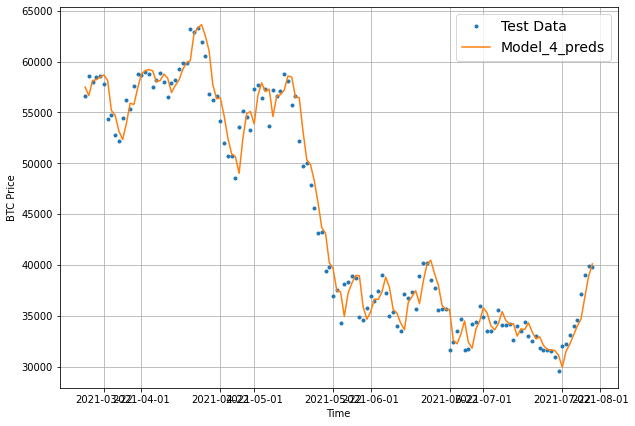

In [233]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=(model_4_preds), 
                 start=offset,
                 format="-",
                 label="Model_4_preds")

### Model 5: LSTM

In [234]:
#Model 5

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, outputs,name="model_5_lstm")

#2. Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
#3.Fit the model
history_5 = model_5.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=0,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_5.name)])


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


In [235]:
model_5.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 842.3524 - mae: 842.3524 - mse: 1865713.7500


[842.3524169921875, 842.3524169921875, 1865713.75]

In [236]:
# load saved best model
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 826.8691 - mae: 826.8691 - mse: 1859509.6250


[826.869140625, 826.869140625, 1859509.625]

In [237]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), 
                                y_pred=(model_5_preds))
model_5_results

{'mae': 826.86926,
 'mape': 2.8030002,
 'mase': 1.0672204,
 'mse': 1859509.9,
 'rmse': 1363.6384}

In [238]:
model_1_results, model_4_results

({'mae': 776.65283,
  'mape': 2.626138,
  'mase': 1.0024073,
  'mse': 1705817.8,
  'rmse': 1306.0696},
 {'mae': 782.69684,
  'mape': 2.6460981,
  'mase': 1.0102082,
  'mse': 1722924.0,
  'rmse': 1312.602})

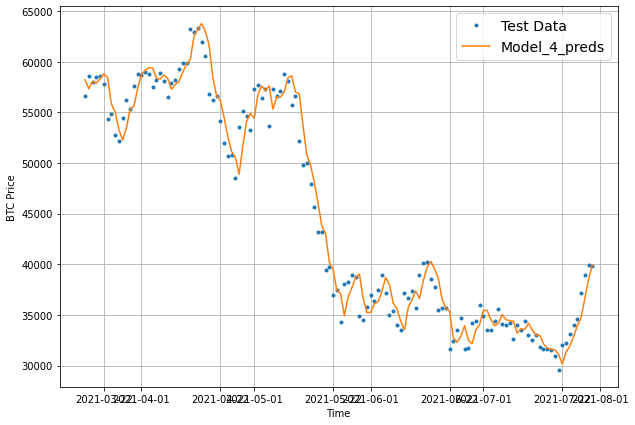

In [239]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=(model_5_preds), 
                 start=offset,
                 format="-",
                 label="Model_4_preds")

### Multivariate time series data

In [241]:
bitcoin_prices.head()

Price
Date                 
2014-11-02  325.22633
2014-11-03  331.60083
2014-11-04  324.71833
2014-11-05  332.45666
2014-11-06  336.58500

In [242]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [245]:
# create date ranges of where specific block reward values shouldbe
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(615, 2024)

In [253]:
# Add in block reward values as a feature in the dataframe
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [254]:
bitcoin_prices_block.tail()

Price block_reward
Date                                 
2021-07-26  34574.670661         6.25
2021-07-27  37114.296624         6.25
2021-07-28  38963.922857         6.25
2021-07-29  39917.449369         6.25
2021-07-30  39810.517971         6.25

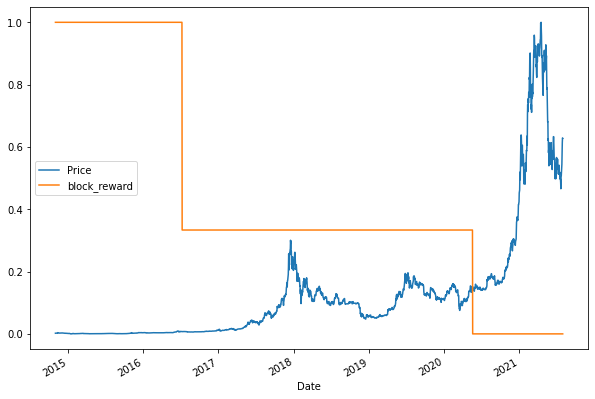

In [259]:
# plot
from sklearn.preprocessing import minmax_scale
scaled_prices_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                        columns=bitcoin_prices_block.columns,
                                                   index=bitcoin_prices_block.index)
scaled_prices_block_df.plot(figsize=(10,7))